## Weapon Seizures In the Neighborhood of Pittsburgh


### Introduction

Understanding crime patterns is crucial for identifying safe neighborhoods in any city. In Pittsburgh, data on weapon seizures offers valuable insights into areas with higher or lower levels of violence. By analyzing trends in the locations, frequencies, and contexts of these seizures, it is possible to assess the relative safety of different neighborhoods. This data-driven approach not only highlights areas of concern but also aids law enforcement and policymakers in implementing targeted interventions to enhance community safety.

![Seizures](https://t4.ftcdn.net/jpg/04/12/58/07/360_F_412580745_ixpEgJlB33PxQXjlKis2V9bdXvSVv5FU.jpg)

### Import the Data Set 


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('seizures.csv')


data.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


### We will now take the data and dipaly each of the different neighborhoods and the total weapon count of them

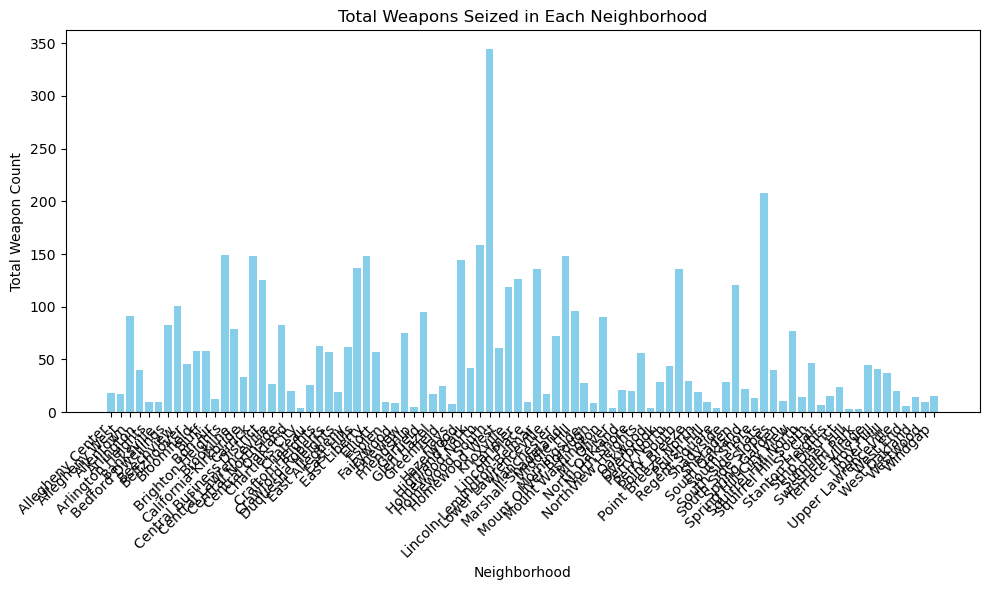

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('seizures.csv')

grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['neighborhood'], grouped_data['total_count'], color='skyblue')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('Total Weapons Seized in Each Neighborhood')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

### As you can see this is **VERY** hard to read with all of the neighborhoods combined, so lets make it a little more managable for the eyes

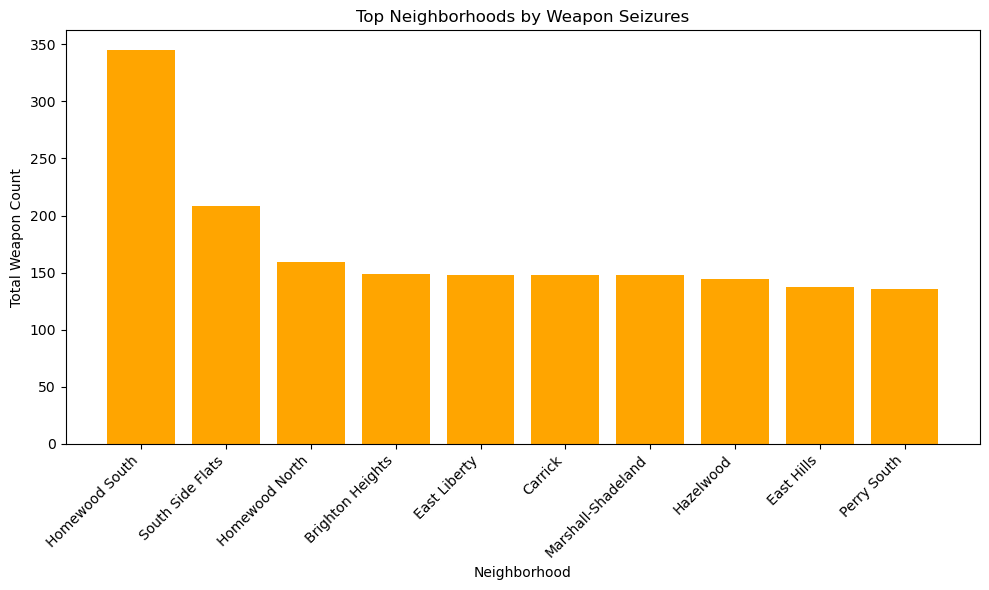

In [7]:
# Group data by neighborhood and sum the total weapon counts
grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()

# Sort the data by total_count in descending order and select the top 10
top_data = grouped_data.sort_values(by='total_count', ascending=False).head(10)

# Display the top 10 neighborhoods
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_data['neighborhood'], top_data['total_count'], color='orange')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('Top Neighborhoods by Weapon Seizures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

## Here is this visulized in a list


In [61]:

import pandas as pd

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names to avoid issues
seizures_data.columns = seizures_data.columns.str.strip()


# Group by neighborhood and sum the total_count of seizures
neighborhood_seizures = seizures_data.groupby('neighborhood')['total_count'].sum()

# Sort the neighborhoods by the total_count of seizures in descending order
top_neighborhoods = neighborhood_seizures.sort_values(ascending=False)

# Display the top neighborhoods with their seizure numbers
print(top_neighborhoods.head(20))  # Display the top 10 neighborhoods

neighborhood
Homewood South               345
South Side Flats             208
Homewood North               159
Brighton Heights             149
East Liberty                 148
Carrick                      148
Marshall-Shadeland           148
Hazelwood                    144
East Hills                   137
Perry South                  136
Lincoln-Lemington-Belmar     136
Larimer                      126
Central Business District    125
Sheraden                     121
Knoxville                    119
Beechview                    101
Middle Hill                   96
Garfield                      95
Allentown                     91
Mount Washington              90
Name: total_count, dtype: int64


### **OKAY OKAY**... Its pretty apparent the neighborhoods that we would want to stay away from when it comes to being the safest neighborhood out there in Pittsburgh, Now lets look at the ones with the lowest weapon seizures

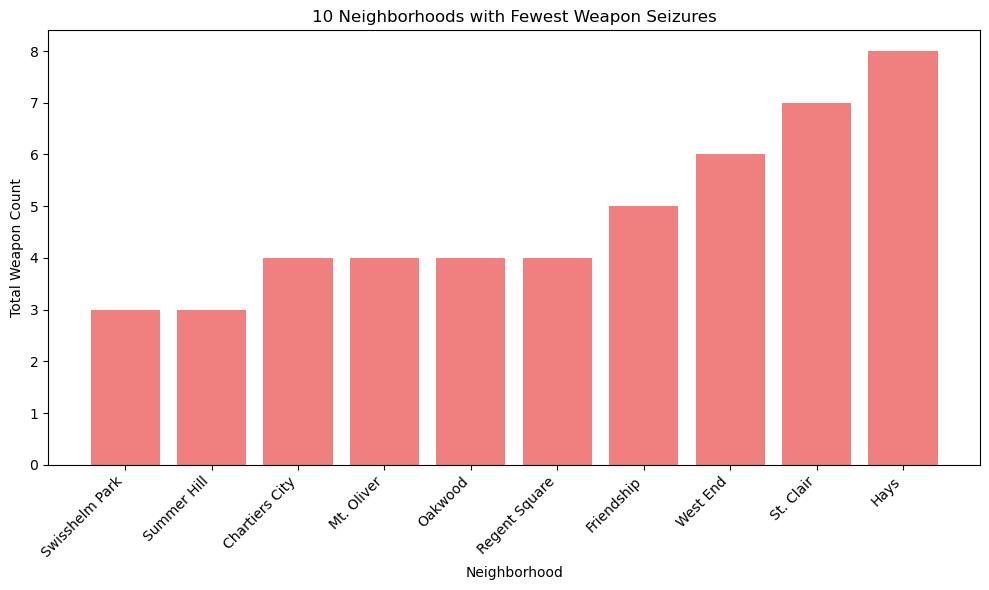

In [32]:
# Group data by neighborhood and sum the total weapon counts
grouped_data = data.groupby('neighborhood')['total_count'].sum().reset_index()

# Sort the data by total_count in ascending order and select the bottom 10
bottom_data = grouped_data.sort_values(by='total_count', ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bottom_data['neighborhood'], bottom_data['total_count'], color='lightcoral')

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Weapon Count')
plt.title('10 Neighborhoods with Fewest Weapon Seizures')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

## Ahhh Yes that is much safer, there are **SO FEW** Weapon Seizures

Now that we see these different weapon seizures, lets see if anything changes when we account for what **TYPE** of weapon was seized 

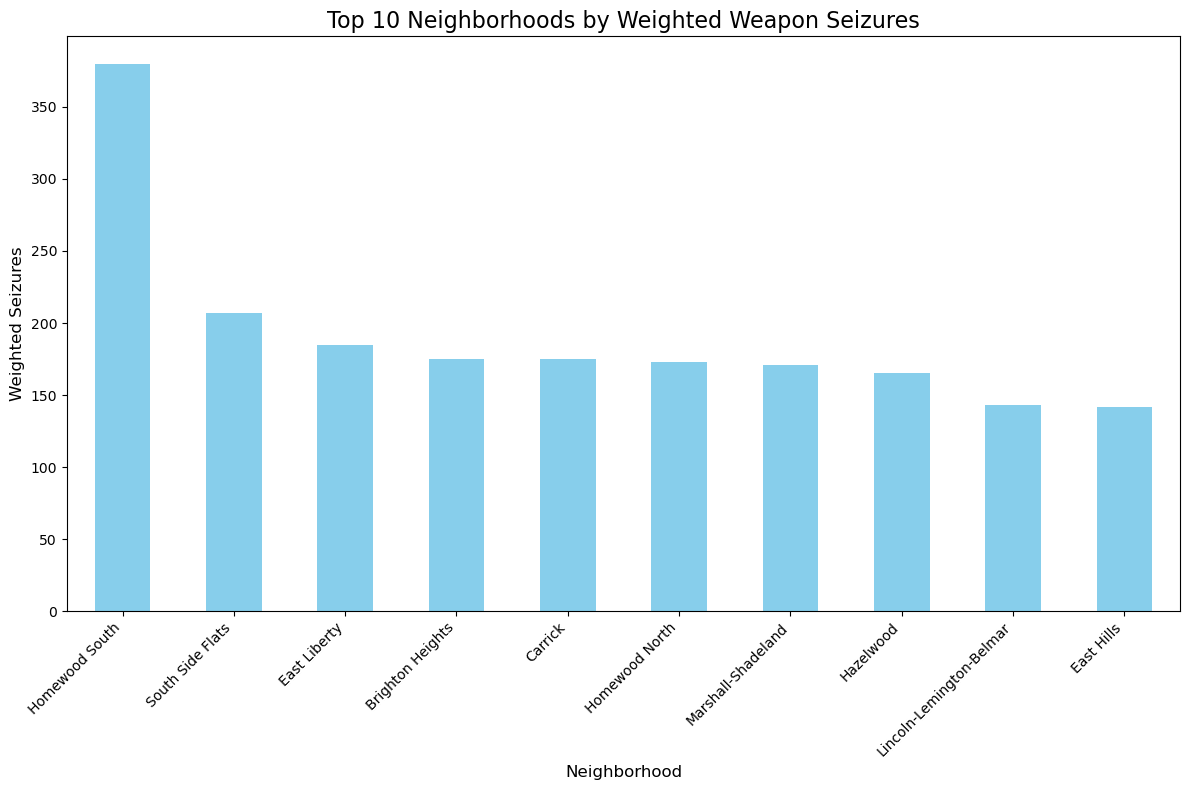

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names
seizures_data.columns = seizures_data.columns.str.strip()

# Assigning weights to each weapon type
weights = {
    'pistol_count': 1,    # Pistol is less dangerous
    'revolver_count': 1,  # Revolver is less dangerous
    'rifle_count': 2,     # Rifle is more dangerous
    'shotgun_count': 2    # Shotgun is more dangerous
}

# Calculate the weighted seizure count for each neighborhood
seizures_data['weighted_seizures'] = (seizures_data['pistol_count'] * weights['pistol_count'] +
                                       seizures_data['revolver_count'] * weights['revolver_count'] +
                                       seizures_data['rifle_count'] * weights['rifle_count'] +
                                       seizures_data['shotgun_count'] * weights['shotgun_count'])

# Group by neighborhood and sum the weighted seizures
neighborhood_weighted_seizures = seizures_data.groupby('neighborhood')['weighted_seizures'].sum()

# Sort the neighborhoods by weighted seizure count in descending order
sorted_neighborhoods = neighborhood_weighted_seizures.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sorted_neighborhoods.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Weighted Weapon Seizures', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Weighted Seizures', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


As we can see this just makes the dangerous neighborhoods more dangerous... That is not good, lets see about the safer neighborhoods


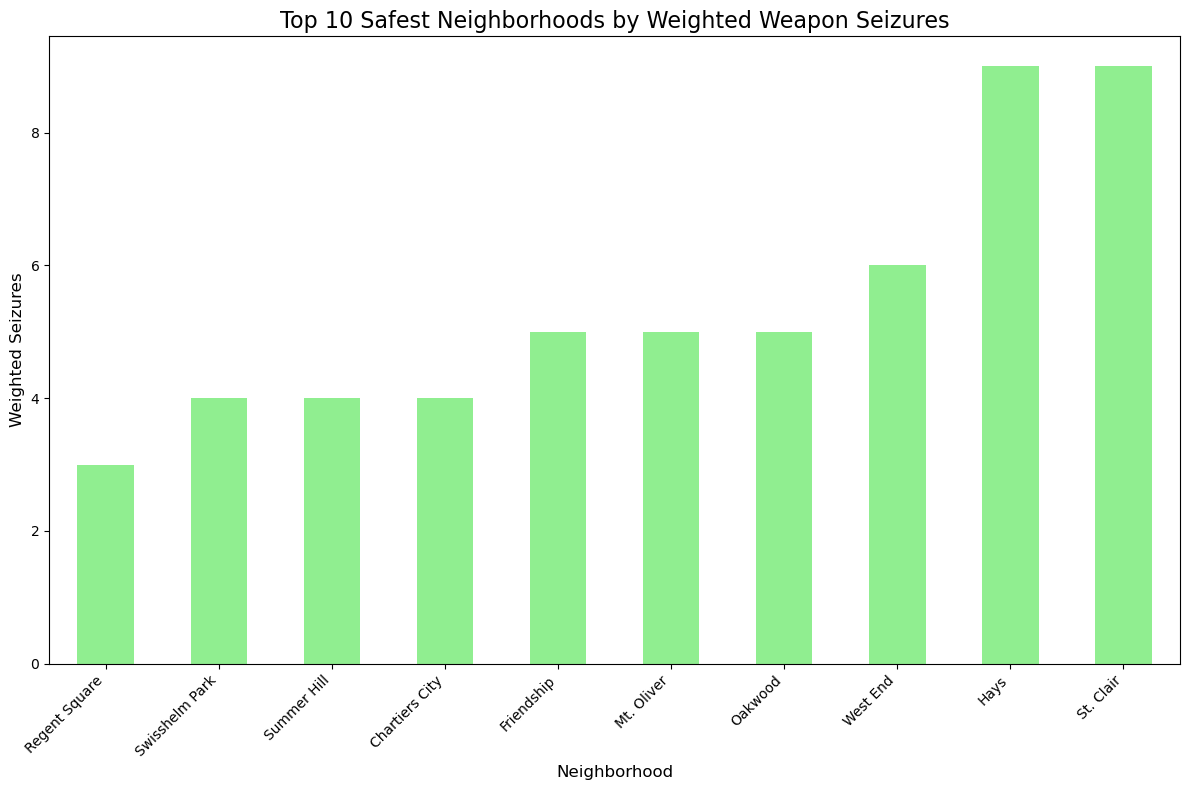

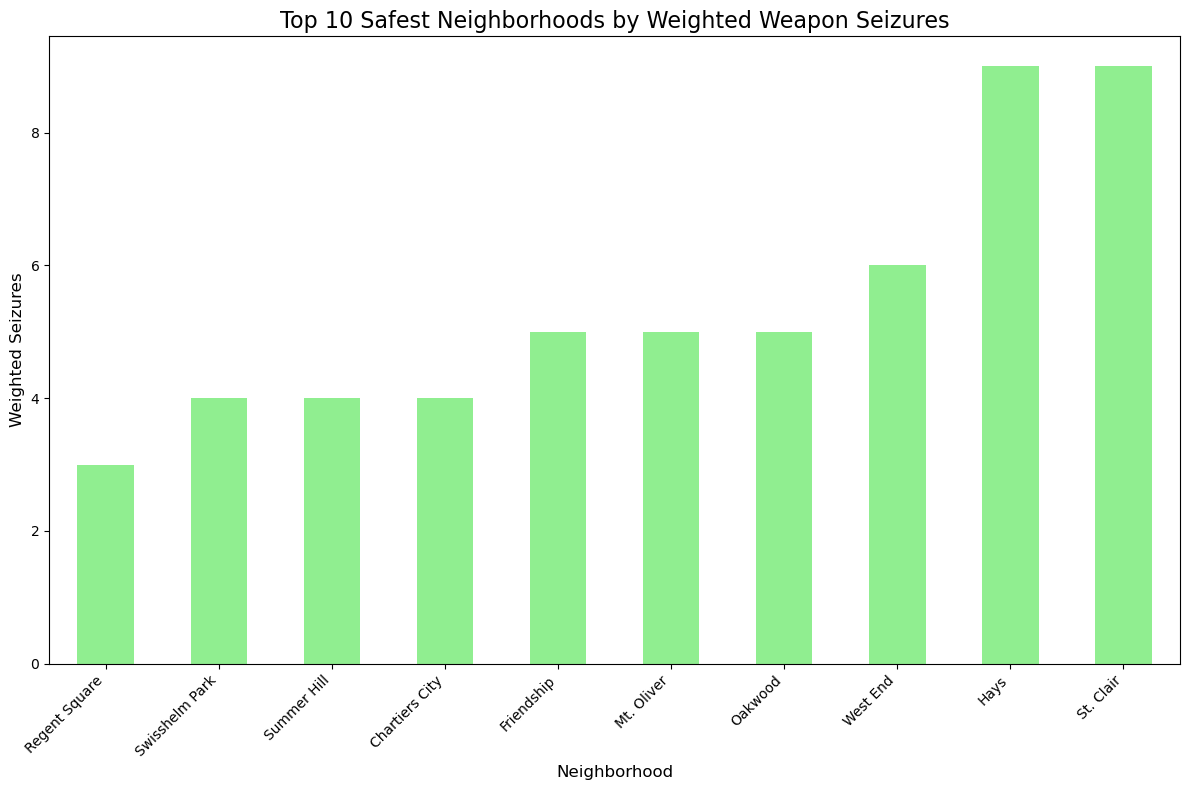

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the seizures data from the CSV file
seizures_data = pd.read_csv('seizures.csv')

# Strip any leading/trailing spaces from column names
seizures_data.columns = seizures_data.columns.str.strip()

# Assigning weights to each weapon type
weights = {
    'pistol_count': 1,    # Pistol is less dangerous
    'revolver_count': 1,  # Revolver is less dangerous
    'rifle_count': 2,     # Rifle is more dangerous
    'shotgun_count': 2    # Shotgun is more dangerous
}

# Calculate the weighted seizure count for each neighborhood
seizures_data['weighted_seizures'] = (seizures_data['pistol_count'] * weights['pistol_count'] +
                                       seizures_data['revolver_count'] * weights['revolver_count'] +
                                       seizures_data['rifle_count'] * weights['rifle_count'] +
                                       seizures_data['shotgun_count'] * weights['shotgun_count'])

# Group by neighborhood and sum the weighted seizures
neighborhood_weighted_seizures = seizures_data.groupby('neighborhood')['weighted_seizures'].sum()

# Sort the neighborhoods by weighted seizure count in ascending order (safer neighborhoods)
sorted_neighborhoods = neighborhood_weighted_seizures.sort_values(ascending=True)

# Plot the results for the top 10 safest neighborhoods
plt.figure(figsize=(12, 8))
sorted_neighborhoods.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Safest Neighborhoods by Weighted Weapon Seizures', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Weighted Seizures', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Ahhh Now we can see that based on the Type of weapon, Regent Square is actually **SAFER** than Swisshelm park which is what we thought the original safest neighborhood, now the kids can play without any worry of weapons 

![Neighborhood](https://thumbs.dreamstime.com/b/kids-playing-street-suburban-neighborhood-vector-illustration-happy-34144342.jpg)

# Conclusion

Based on the analysis of weapon seizures data, weighted by the relative danger levels of various weapon types (pistols, revolvers, rifles, and shotguns), Regent Square stands out as the safest neighborhood under the defined safety standards. The calculated weighted scores reveal that Regent Square consistently has the lowest total weapon-related danger level among all neighborhoods, demonstrating a minimal presence of high-risk weapon types.

This data-driven assessment highlights Regent Square as a model of community safety, providing valuable insights for policymakers and local authorities seeking to enhance safety measures across other neighborhoods.